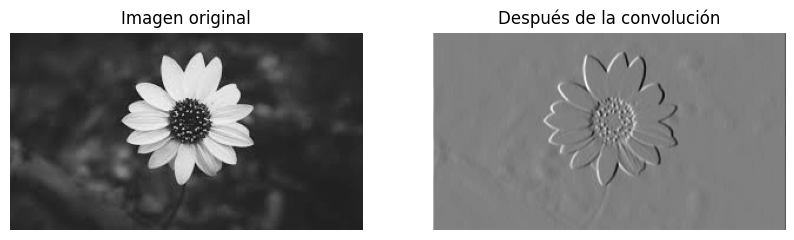

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer imagen en escala de grises
image = cv2.imread('/content/flour.jpeg', cv2.IMREAD_GRAYSCALE)

# Definir función de convolución (ya definida antes)
def convolve2d(image, kernel, padding=0, stride=1):
    kernel = np.flipud(np.fliplr(kernel))  # Voltear el kernel
    x_img, y_img = image.shape
    x_k, y_k = kernel.shape

    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    x_out = (x_img + 2 * padding - x_k) // stride + 1
    y_out = (y_img + 2 * padding - y_k) // stride + 1
    output = np.zeros((x_out, y_out))

    for i in range(0, x_out):
        for j in range(0, y_out):
            region = image[i*stride:i*stride+x_k, j*stride:j*stride+y_k]
            output[i, j] = np.sum(region * kernel)

    return output

# Kernel de detección de bordes (Sobel horizontal)
kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

# Aplicar convolución
output = convolve2d(image, kernel, padding=1)

# Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Después de la convolución")
plt.imshow(output, cmap='gray')
plt.axis('off')

plt.show()


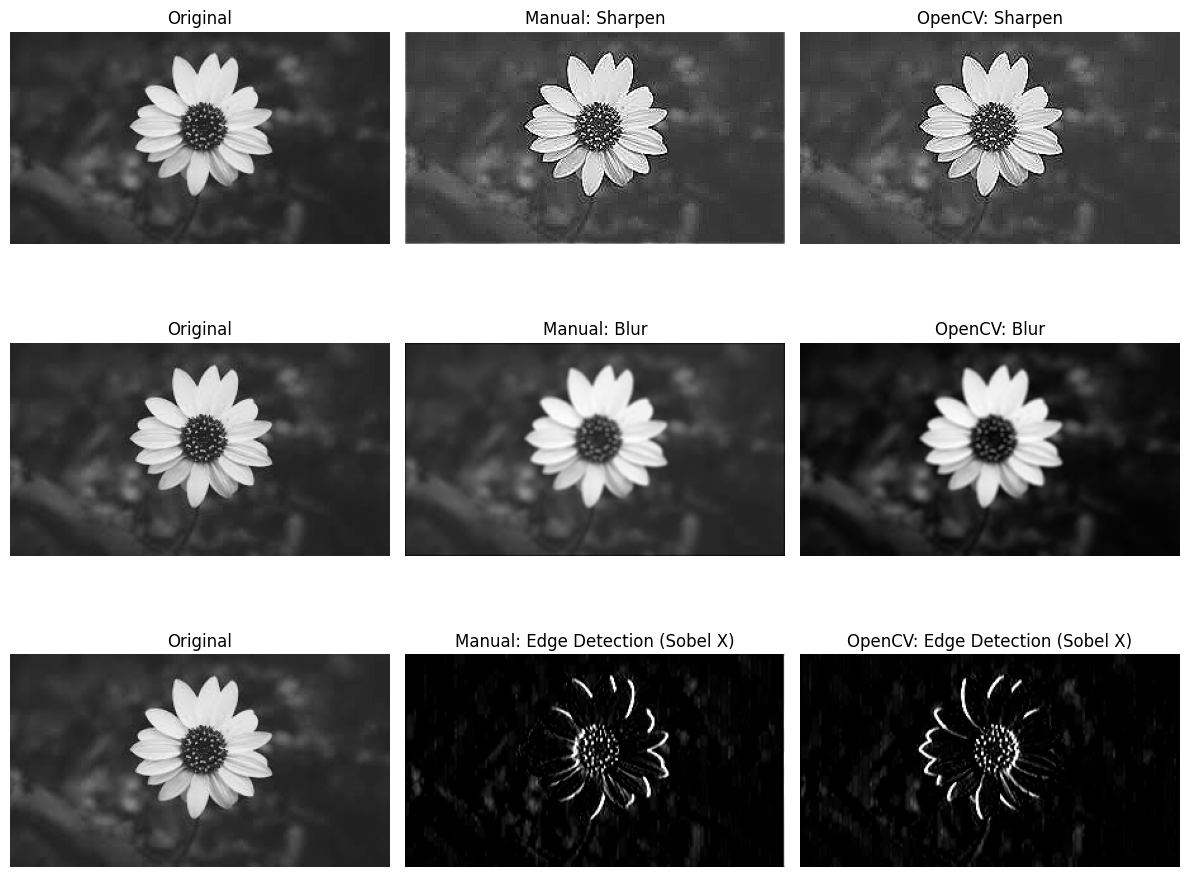

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer imagen en escala de grises
image = cv2.imread('/content/flour.jpeg', cv2.IMREAD_GRAYSCALE)

# Función de convolución 2D manual
def convolve2d(image, kernel, padding=0, stride=1):
    kernel = np.flipud(np.fliplr(kernel))  # Voltear kernel (convención)
    x_img, y_img = image.shape
    x_k, y_k = kernel.shape

    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    x_out = (x_img + 2 * padding - x_k) // stride + 1
    y_out = (y_img + 2 * padding - y_k) // stride + 1
    output = np.zeros((x_out, y_out))

    for i in range(0, x_out):
        for j in range(0, y_out):
            region = image[i*stride:i*stride+x_k, j*stride:j*stride+y_k]
            output[i, j] = np.sum(region * kernel)

    return np.clip(output, 0, 255).astype(np.uint8)

# === Definir los 3 kernels ===
kernels = {
    'Sharpen': np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]]),

    'Blur': (1/9) * np.ones((3, 3)),

    'Edge Detection (Sobel X)': np.array([[-1, 0, 1],
                                          [-2, 0, 2],
                                          [-1, 0, 1]])
}

# Aplicar y comparar resultados
fig, axes = plt.subplots(len(kernels), 3, figsize=(12, 10))

for i, (name, kernel) in enumerate(kernels.items()):
    # Manual
    manual = convolve2d(image, kernel, padding=1)

    # OpenCV
    opencv_result = cv2.filter2D(image, -1, kernel)

    # Mostrar
    axes[i, 0].imshow(image, cmap='gray')
    axes[i, 0].set_title("Original")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(manual, cmap='gray')
    axes[i, 1].set_title(f'Manual: {name}')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(opencv_result, cmap='gray')
    axes[i, 2].set_title(f'OpenCV: {name}')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

image = cv2.imread('/content/flour.jpeg', cv2.IMREAD_GRAYSCALE)

def interactive_blur(ksize):
    if ksize % 2 == 0:
        ksize += 1
    blur_kernel = np.ones((ksize, ksize), np.float32) / (ksize * ksize)
    result = cv2.filter2D(image, -1, blur_kernel)

    plt.figure(figsize=(6, 6))
    plt.imshow(result, cmap='gray')
    plt.title(f'Desenfoque con kernel {ksize}x{ksize}')
    plt.axis('off')
    plt.show()

interact(interactive_blur, ksize=IntSlider(min=1, max=21, step=2, value=3));


interactive(children=(IntSlider(value=3, description='ksize', max=21, min=1, step=2), Output()), _dom_classes=…

https://chatgpt.com/share/68118871-d808-8004-a4a6-709cae37f0a7